In [1]:
#Basic Data analysis and munging (if needed)
import pandas as pd
import numpy as np

#Changing these settings allows us to view the entirety of the collumns avoiding that "..." in the middle of the df prints.
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#Data Set being used is the Mushroom Data set from UCI ML
#Found here https://www.kaggle.com/uciml/mushroom-classification

df = pd.read_csv("mushrooms.csv")

df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


Right away we can see that the Data are not numerical, this will make things a bit teadious so we'll have to make these numerical categories, but I want to be sure there aren't any missing Data entries first.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

Everything looks good in that regard 8124 entries down the line I'll try something with sklearn's labelencoder, this can be used to turn the string(object) entries into a numerical value for each of the same entries also allowing us to convert them back later on if we want to.

For Example if a column has ['apples', 'peaches', 'pears', 'apples']the label encoder could give us [ 1, 2, 3, 1], numerical Data is beautiful and easier to work with.

In [3]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()

for column in df:
    df[column] = le.fit_transform(df[column])
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null int32
cap-shape                   8124 non-null int32
cap-surface                 8124 non-null int32
cap-color                   8124 non-null int32
bruises                     8124 non-null int32
odor                        8124 non-null int32
gill-attachment             8124 non-null int32
gill-spacing                8124 non-null int32
gill-size                   8124 non-null int32
gill-color                  8124 non-null int32
stalk-shape                 8124 non-null int32
stalk-root                  8124 non-null int32
stalk-surface-above-ring    8124 non-null int32
stalk-surface-below-ring    8124 non-null int32
stalk-color-above-ring      8124 non-null int32
stalk-color-below-ring      8124 non-null int32
veil-type                   8124 non-null int32
veil-color                  8124 non-null int32
ring-number                 8

Wonderful as we can see the labelencoder has converted every categorical string input into an int that can be converted back later, let's check df.head to see a few of the entries now.

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


This looks much nicer to work with in my opinion, looking at just these entries I can see that some of the columns can go quite a big higher than the others, I wonder if I can look into that a bit more and see the Max numbers of each, the ones where we see a max of 1 lets us know that there are 2 options for that column type

For example the 'class' is if a mushroom is poisonous or edible.

In [5]:
df.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


I'd Like to look at this data in a few different ways, to see what Features may be most effective for use as features, seeing The different types of "Color" columns and the "odor" column having so many more potential options I kinda of want to avoid that and go with the "size" type of mushrooms, since there are less potential options classifying the mushrooms would be "simpler" but could lead to overfitting (assumption)

In [6]:
#I'll be using seaborn to pairplot each of these with the hue being the class of the mushroom.
import seaborn as sns


C:\Users\Zach\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Zach\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


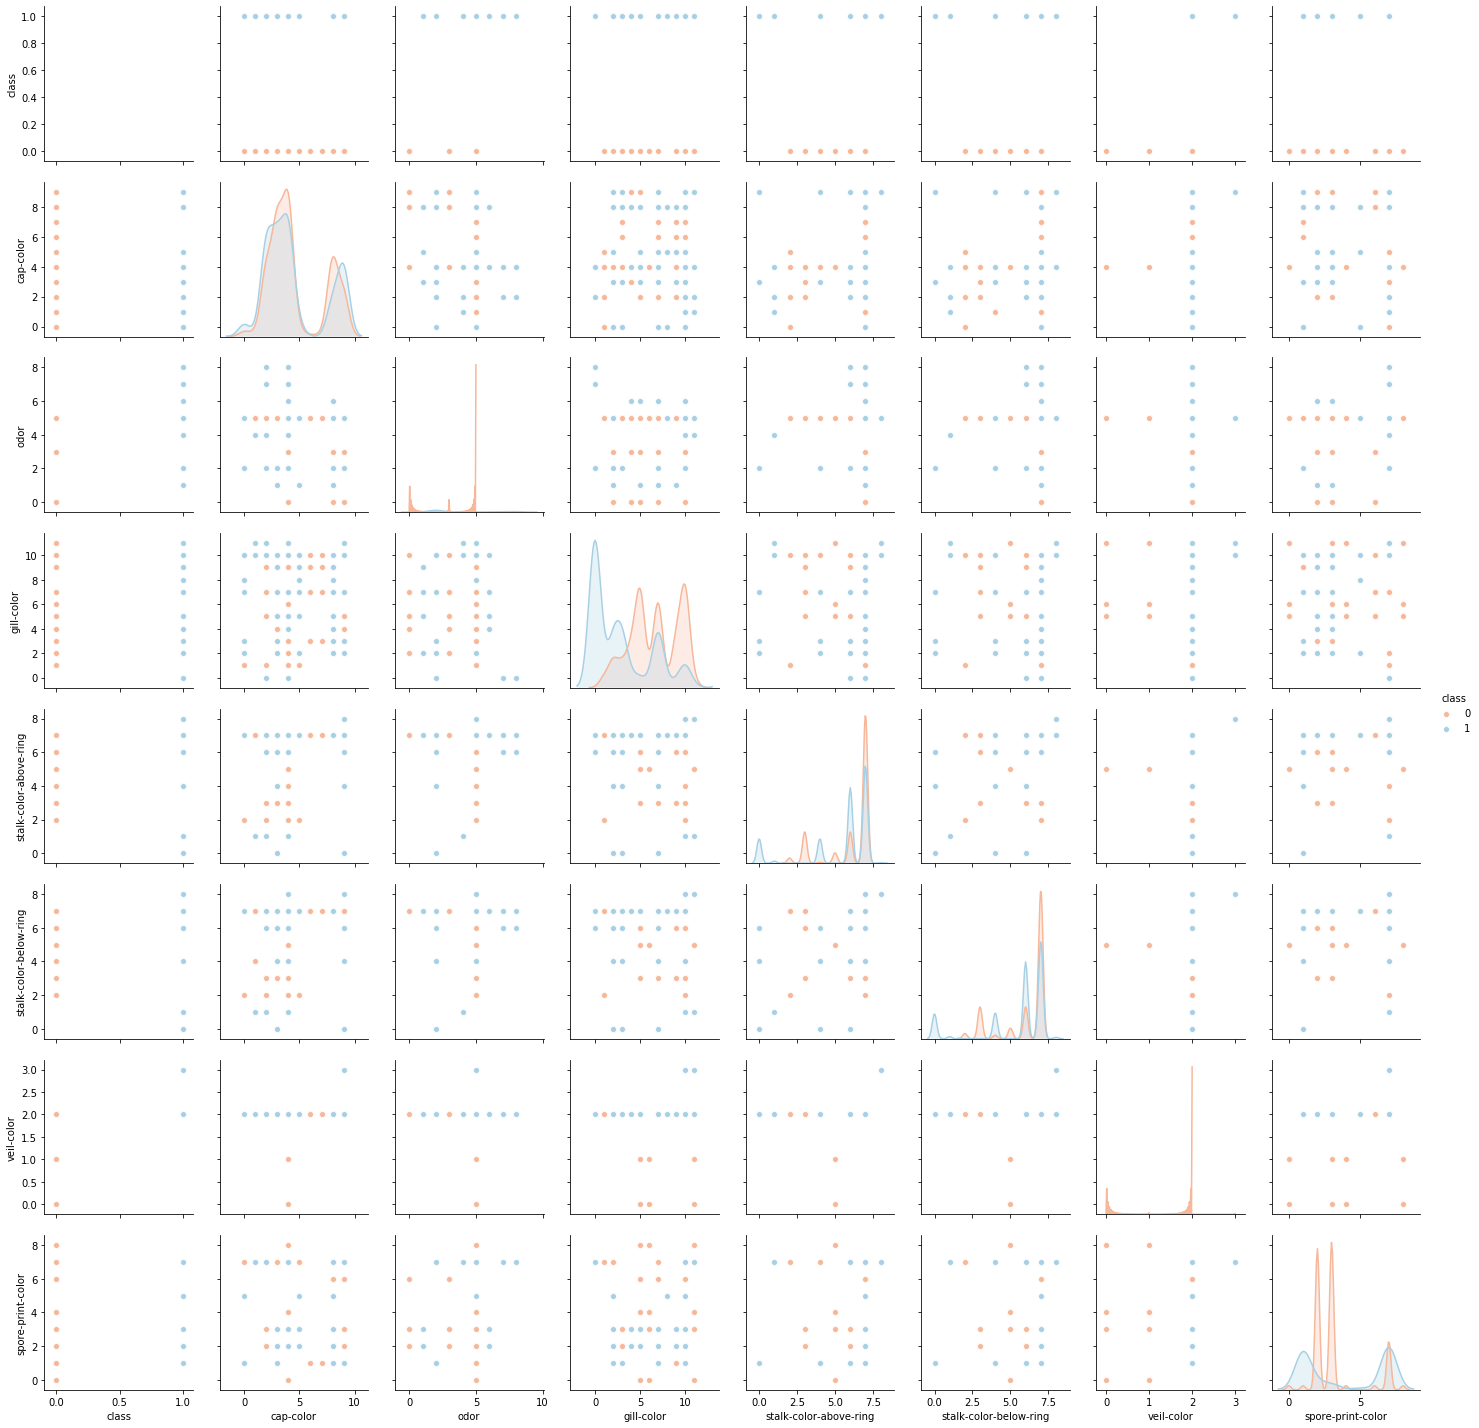

In [7]:
# Chosing just the color columns for now. I do the pairplot only because I like to look for colinearity or very clear patterns
# Between some of the features, perhaps we don't need to use 2 of them if they are very similar.

cols = ['class',
        'cap-color',
        'odor',
        'gill-color',
        'stalk-color-above-ring',
        'stalk-color-below-ring',
        'veil-color',
        'spore-print-color',
       ]


sns.pairplot(data=df[cols], hue='class', palette='RdBu')

Ended up with an error I had included the same features and the graph could not be made, but the rest of this persisted correctly. 

Veil-color looks to be very easily readable and likely a great way to classify each mushroom, as we can see there is a pretty clear division on each, if we end up doing a decision tree or random forest that will likely be a node selected, A lot of these can show us that for many of the color options there seems to be a very dominant class type of edible or poisonous The way I see these dots is that, the less "Checkering" there is the more grouped or defined a feature is.

I see quite a bit of large grouped edible and poisonous plants in each of these, why not keep these guesses and see what the correlation actually looks like with a correlation matrix plot.

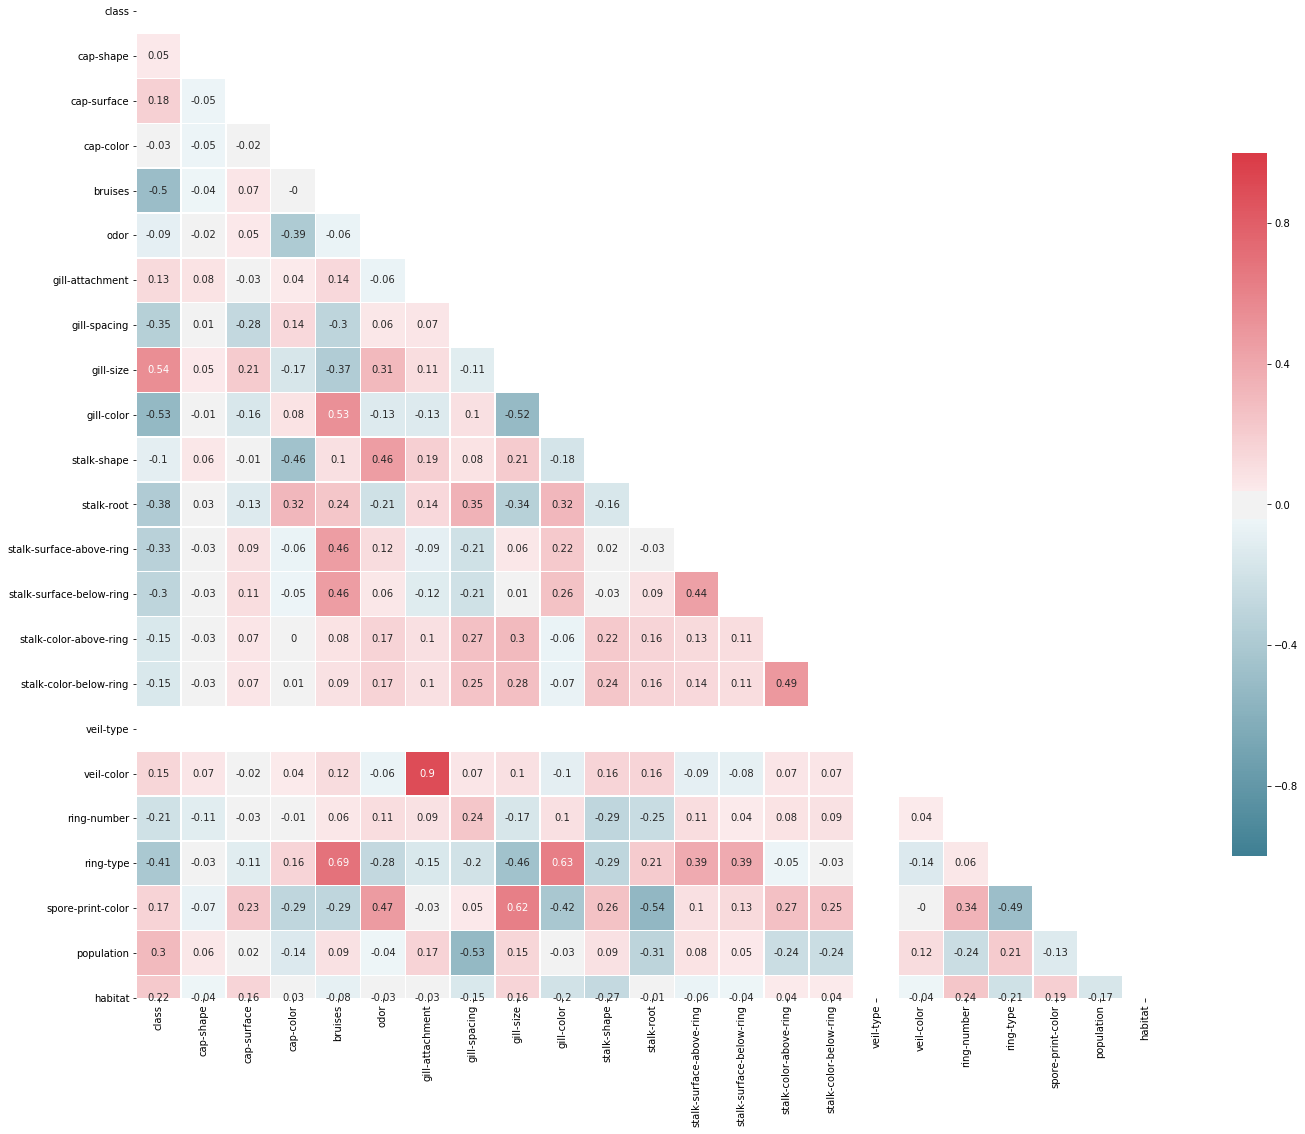

In [8]:
import matplotlib.pyplot  as plt

#Rounding the outputs so it's not an abomination.
corr = df.corr().round(2) 

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Figure size, ctrl+ mousewheel to zoom in however.
f, ax = plt.subplots(figsize=(20, 20))

# Colormapping google color editor, and sns documentation
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

Awesome, now we see why picking and choosing ahead of time can be a bit of a mess, there really isnt much correlation between many of color types we chose as well as the habitat/population columns, even though the very simple plotting we did show some grouping and make our on hypothesis' to learn from.

We see greater some interesting correlation between the similarly named ones for example the stalk-surface-above and below the ring as well as the color, it's likely necesary to use just one of those features, so lets drop the two "below" features.




In [9]:
delete_cols = ['stalk-surface-below-ring', 
               'stalk-color-below-ring']

df = df.drop(delete_cols, axis=1)

df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-color-above-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'], dtype='object')

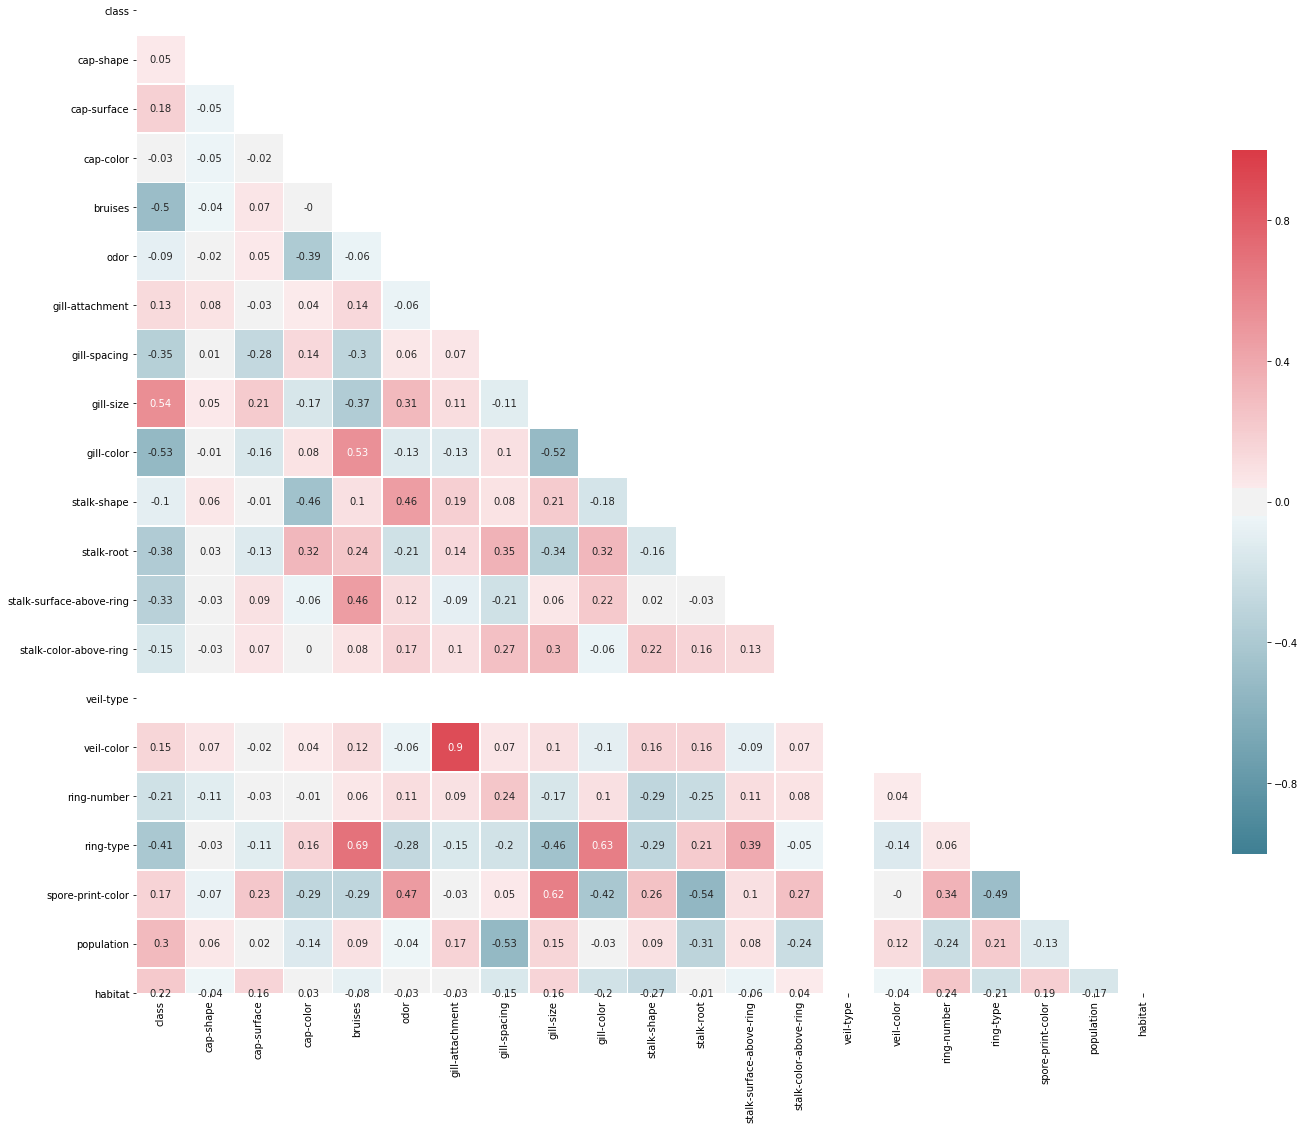

In [10]:
corr = df.corr().round(2)
# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

I'm starting to understand the Data a good bit more; learning what features are reduntant and unnecesary is a great feeling, I still need to work on reading the pairplots . I can't wait to see what our Forest will look like.


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# I Create an X variable here purely because it's easier for me to recall what I was doing when I go back and look at this.
# When it comes to classification in datasets when we split this dataset having duplicates will likely lead to an 
# Unreasonably high accuracy.
# We can create our X and remove any duplicates if there were any.
X = df.drop_duplicates(keep='first')

#the classification "feature" and our final Dataset to Split
y = X['class']
X = X.drop(['class'], axis=1)
#I used a random state to test the random forest classifier parameters.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [73]:
# n_estimators is the number of trees we will use
# Max_depth determins the amount of features to be used in classification
# Once again using a random state to keep the same sets, I could alter criterion as well.
# The random Forest
forest = RandomForestClassifier(n_estimators=100, max_depth=6 , random_state=50, criterion='gini')  

forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [74]:
#Kinda neat to see all the Decision trees made in one spot like this. Recall I did not add a max depth.
#forest.estimators_

In [75]:
#Lets Test this out.
from sklearn.metrics import confusion_matrix

prediction = forest.predict(X_test)


cfm = confusion_matrix(y_test, prediction)

true_negative = cfm[0][0]
false_positive = cfm[0][1]
false_negative = cfm[1][0]
true_positive = cfm[1][1]

print(sum(cfm))

print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print('Correct Predictions', 
      round((true_negative + true_positive) / len(prediction) * 100, 1), '%')

[752 450]
True Negative: 736
False Positive: 0
False Negative: 16
True Positive: 450
Correct Predictions 98.7 %


AWESOME! we got a 98.7% Correct predicictions with our Random Forst of 100 trees and a max_depth of 6, and it seems as though there were 16 poisonous mushrooms that should have been classified as poisonous. I also would note that when increasing the max depth by just one (to 7) the Correct Predictions becomes 100%, but that means that for each of the 100 trees there is another layer of featyures to help determine a classification.